In [18]:
from utils import sleepy

import tskit
import msprime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Minimal version of simulation function

In [31]:
def minimal_sleepy(N, b, selection_activation_generation=10_000, output_directory="./example/"):
    sleepy(n_simulations=1, # number of simulations
       num_generations=100000000, # maxium number of generations
       N=N, # population size
       m=100, # upper-limit of seed generation
       b=b, # germination rate
       gc=50, # garbage collection
       mu=0, # mutation rate
       r=5e-5, # recombination rate
       L=1e4, # sequence mapping length
       
       # rate at which selective mutations are introduced *NOT IMPLEMENTED*
       # mutations are introduced statically at mutation_activation generation
       # if lost reintoduction of mutation
       # if fixed stop simulation or continue depending on generations_post_fixation_threshold parameter
       mu_selection_rates="5e-10", 
       
       selection_coefficients=1.0, # selection coefficient
       dominance_coefficients="0.5", # dominance coefficient
       selection_positions="5000", # mapping postion of positive selection
       mutation_in_seeds=True, # allow for mutating seeds
       stop_after_mrca=False, # stop simulation after mrca is found
       debug_print=False, # debuging info used during development
       output_name="run", # outputname
       selection_activation_generation=10_000, # selective mutation will be introduced at generation at
       generations_post_fixation_threshold=-1, # run for n simulations after fixation event (used for recovery)
       output_directory=output_directory,
       n_parallel=10, # for running locally
       continue_from=0, # start from n-th simulation
       print_cmd=False, # don't run but print bash command
       slurm=True, # output slurm script
       slurm_limit=100, # slurm parallelization options 1
       slurm_divide=1); # slurm parallelization options 2

# Example

In [34]:
minimal_sleepy(N=500, b=1.0, output_directory="./germination_rate_b1/")
minimal_sleepy(N=500, b=0.5, output_directory="./germination_rate_b05/")

In [20]:
ts_b1 = tskit.load("./germination_rate_b1/run_0.trees"); ts_b1

In [6]:
ts_b05 = tskit.load("./germination_rate_b05/run_0.trees"); ts_b05

Text(0.5, 1.0, 'b = 0.5')

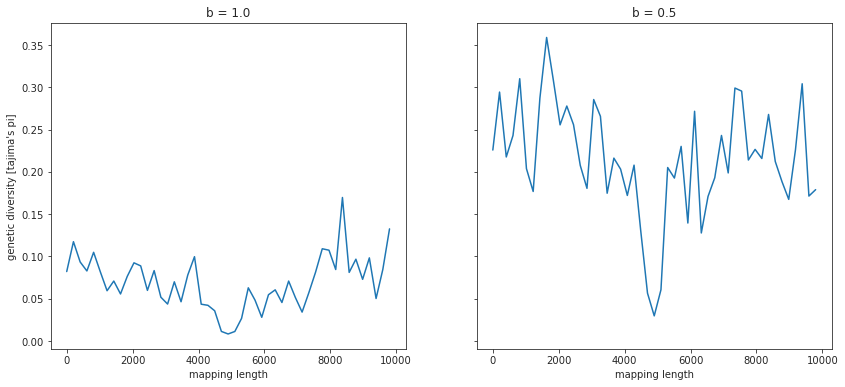

In [35]:
def calculate_diversity_along_genome(ts):
    ts = msprime.sim_mutations(ts, rate=5e-5, discrete_genome=False, keep=False)
    windows = np.linspace(0, ts.sequence_length, 50) # window size 200
    diversity = ts.diversity(windows=windows, span_normalise=True, mode="site").tolist()
    return diversity



sns.set_style("ticks")
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.lineplot(x=windows[:-1], y=calculate_diversity_along_genome(ts_b1), ax=ax[0])
ax[0].set(xlabel="mapping length", ylabel="genetic diversity [tajima's pi]")
ax[0].set_title('b = 1.0')

sns.lineplot(x=windows[:-1], y=calculate_diversity_along_genome(ts_b05), ax=ax[1])
ax[1].set(xlabel="mapping length", ylabel="genetic diversity [tajima's pi]")
ax[1].set_title('b = 0.5')